Complete the following tasks.

1. Import the data set as a pandas DataFrame.
1. Find the names of all the movies whose length is at least 180min.
1. Using multiple filtering, find the names of all the movies whose length is at least 180min, or whose vote average is at least 8.0. (Hint: use the logical operator |)
1. Using multiple filtering find the names of all the movies whose length is at least 180min, and whose vote average is at least 8.0. (Hint: use the logical operator & )
1. Using multiple filtering, find the names of all the movies whose length is at least 180min, and whose vote average is at least 8.0 and whose original language is not English. (Hint: use the logical operator & twice )

Hint: You will have to use the bitwise logical operators |(or) and &(and):

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [7]:
df.dropna(thresh=4000, axis=1,inplace=True)
df['runtime'].fillna(value=df['runtime'].mean(), inplace=True)
df['overview'].fillna(value='Overview not available', inplace=True)
df['release_date'].fillna(method='ffill', inplace=True)

In [16]:
filter_180mn = df['runtime'] >= 180
filter_average8 = df['vote_average'] >= 8
filter_notenglish = df['original_language'] != 'en'

In [19]:
df.loc[filter_180mn].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 24 to 4592
Data columns (total 18 columns):
budget                  47 non-null int64
genres                  47 non-null object
id                      47 non-null int64
keywords                47 non-null object
original_language       47 non-null object
original_title          47 non-null object
overview                47 non-null object
popularity              47 non-null float64
production_companies    47 non-null object
production_countries    47 non-null object
release_date            47 non-null object
revenue                 47 non-null int64
runtime                 47 non-null float64
spoken_languages        47 non-null object
status                  47 non-null object
title                   47 non-null object
vote_average            47 non-null float64
vote_count              47 non-null int64
dtypes: float64(3), int64(4), object(11)
memory usage: 7.0+ KB


In [20]:
df.loc[filter_180mn | filter_average8].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 24 to 4755
Data columns (total 18 columns):
budget                  125 non-null int64
genres                  125 non-null object
id                      125 non-null int64
keywords                125 non-null object
original_language       125 non-null object
original_title          125 non-null object
overview                125 non-null object
popularity              125 non-null float64
production_companies    125 non-null object
production_countries    125 non-null object
release_date            125 non-null object
revenue                 125 non-null int64
runtime                 125 non-null float64
spoken_languages        125 non-null object
status                  125 non-null object
title                   125 non-null object
vote_average            125 non-null float64
vote_count              125 non-null int64
dtypes: float64(3), int64(4), object(11)
memory usage: 18.6+ KB


In [21]:
df.loc[filter_180mn & filter_average8].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 329 to 4535
Data columns (total 18 columns):
budget                  7 non-null int64
genres                  7 non-null object
id                      7 non-null int64
keywords                7 non-null object
original_language       7 non-null object
original_title          7 non-null object
overview                7 non-null object
popularity              7 non-null float64
production_companies    7 non-null object
production_countries    7 non-null object
release_date            7 non-null object
revenue                 7 non-null int64
runtime                 7 non-null float64
spoken_languages        7 non-null object
status                  7 non-null object
title                   7 non-null object
vote_average            7 non-null float64
vote_count              7 non-null int64
dtypes: float64(3), int64(4), object(11)
memory usage: 1.0+ KB


In [23]:
df.loc[filter_180mn & filter_average8 & filter_notenglish].head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
4535,2000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",346,"[{""id"": 233, ""name"": ""japan""}, {""id"": 1462, ""n...",ja,七人の侍,A samurai answers a village's request for prot...,39.756748,"[{""name"": ""Toho Company"", ""id"": 882}]","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1954-04-26,271841,207.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Seven Samurai,8.2,878


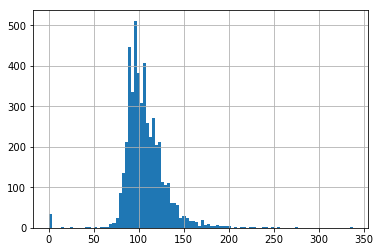

In [30]:
df['runtime'].hist(bins=100)

In [31]:
df[df.runtime < 50]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
1011,0,"[{""id"": 27, ""name"": ""Horror""}]",53953,"[{""id"": 10292, ""name"": ""gore""}, {""id"": 12339, ...",de,The Tooth Fairy,A woman and her daughter (Nicole Muñoz) encoun...,0.716764,[],[],2006-08-08,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Tooth Fairy,4.3,13
3112,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",41894,[],en,Blood Done Sign My Name,A drama based on the true story in which a bla...,0.397341,[],[],2010-02-01,0,0.0,[],Released,Blood Done Sign My Name,6.0,5
3354,0,"[{""id"": 99, ""name"": ""Documentary""}]",24977,"[{""id"": 6075, ""name"": ""sport""}]",en,Michael Jordan to the Max,This documentary showcases basketball player M...,1.830306,"[{""name"": ""IMAX"", ""id"": 3447}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2000-05-05,21268532,46.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Michael Jordan to the Max,7.5,10
3471,6000000,"[{""id"": 99, ""name"": ""Documentary""}]",57612,"[{""id"": 630, ""name"": ""dolphin""}, {""id"": 4676, ...",en,Dolphins and Whales: Tribes of the Ocean,This documentary goes to coral reefs of the Ba...,0.041651,"[{""name"": ""3D Entertainment"", ""id"": 5313}, {""n...","[{""iso_3166_1"": ""BS"", ""name"": ""Bahamas""}, {""is...",2008-02-15,7518876,42.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Dolphins and Whales: Tribes of the Ocean,8.0,3
3626,5000000,"[{""id"": 99, ""name"": ""Documentary""}]",78394,"[{""id"": 10506, ""name"": ""prehistoric""}, {""id"": ...",en,Sea Rex 3D: Journey to a Prehistoric World,"Through the power of IMAX 3D, experience a won...",4.498368,"[{""name"": ""N3D Land Productions"", ""id"": 29943}...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2010-05-14,4074023,41.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Sea Rex 3D: Journey to a Prehistoric World,5.9,11
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Should've Been Romeo,0.0,0
3809,4000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",158150,[],en,How to Fall in Love,"An accountant, who never quite grew out of his...",1.923514,"[{""name"": ""Annuit Coeptis Entertainment Inc."",...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-21,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,How to Fall in Love,5.2,20
3953,0,"[{""id"": 10752, ""name"": ""War""}, {""id"": 18, ""nam...",281230,"[{""id"": 187056, ""name"": ""woman director""}]",en,Fort McCoy,Unable to serve in World War II because of a h...,0.384496,[],[],2014-01-01,0,0.0,[],Released,Fort McCoy,6.3,2
3992,0,[],346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],"[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2015-06-26,0,0.0,[],Released,Sardaarji,9.5,2
4068,0,[],371085,[],en,Sharkskin,The Post War II story of Manhattan born Mike E...,0.027801,[],[],2015-01-01,0,0.0,[],Released,Sharkskin,0.0,0
